Modalidades detectadas: ['m0', 'm1', 'm2', 'm3', 'm4']


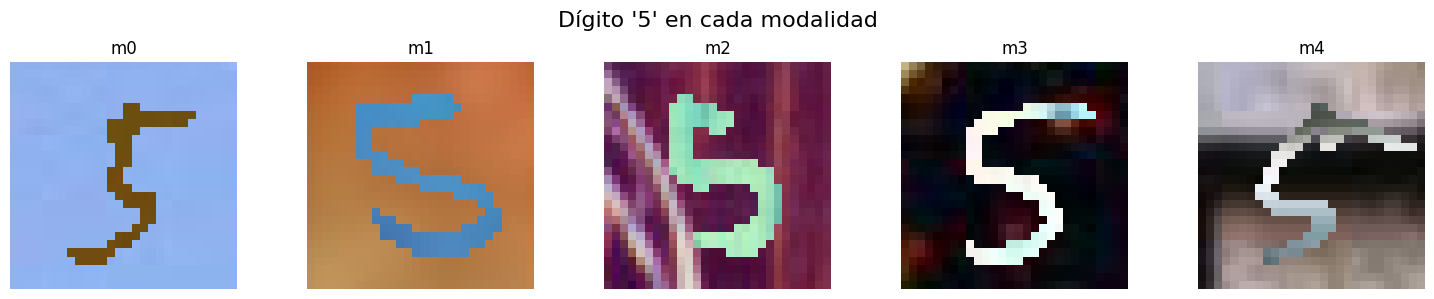

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Definir carpeta base (desde donde se ejecuta el notebook)
base_dir = "train"

# Detectar automáticamente todas las modalidades m0, m1, ..., m4
modalities = sorted([
    d for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d)) and d.startswith("m")
])

print("Modalidades detectadas:", modalities)

# Elegir qué dígito mostrar (0 al 9)
target_label = "5"  

images = []

# Recorrer cada modalidad
for mod in modalities:
    folder_path = os.path.join(base_dir, mod)

    # Filtrar imágenes con la etiqueta deseada 
    all_images = [
        f for f in os.listdir(folder_path)
        if f.endswith(".png") and f.split(".")[1] == target_label
    ]

    if not all_images:
        print(f"No se encontraron imágenes con etiqueta {target_label} en {mod}")
        continue

    # Elegir una imagen aleatoria de esa etiqueta
    img_file = random.choice(all_images)
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)
    images.append((mod, img))

# Mostrar las imágenes seleccionadas
plt.figure(figsize=(15, 3))
for idx, (mod, img) in enumerate(images):
    plt.subplot(1, len(images), idx + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{mod}")
    plt.axis("off")

plt.suptitle(f"Dígito '{target_label}' en cada modalidad", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# Convertir las imágenes a escala de grises y luego a vectores de 784 dimensiones
X = np.array([np.array(img.convert('L')).flatten() for _, img in images])  # Convertir a escala de grises
y = np.array([target_label] * len(images))  # Etiquetas del dígito "5"

# Mostrar las formas para asegurarnos de que todo esté correcto
print("X shape:", X.shape)  # Debería ser (5, 784)
print("y shape:", y.shape)


X shape: (5, 784)
y shape: (5,)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir las carpetas de entrenamiento y prueba
train_dir = "train"
test_dir = "test"

# Generadores de datos con normalización
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generador para entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=64,
    class_mode='categorical'
)

# Generador para prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

x_train = []
y_train = []
x_test = []
y_test = []

# Bucle para recorrer el generador de entrenamiento
for img_batch, label_batch in train_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_train.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_train.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_train) >= len(train_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Bucle para recorrer el generador de prueba
for img_batch, label_batch in test_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_test.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_test.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_test) >= len(test_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Convertir las listas a arrays de numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Verificar las formas
print("x_train shape:", x_train.shape)  
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)  
print("y_test shape:", y_test.shape)

# 3. Entrenar el modelo K-NN
k = 3  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# 4. Evaluar el modelo
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo K-NN: {accuracy * 100:.2f}%")


x_train shape: (300000, 784)
y_train shape: (300000,)
x_test shape: (50000, 784)
y_test shape: (50000,)
Precisión del modelo K-NN: 37.02%


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
import numpy as np
from PIL import Image

# Generadores de datos con normalización
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Definir carpetas
train_dir = "train"
test_dir = "test"

# Generadores de imágenes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Listas para almacenar las imágenes y etiquetas
x_train = []
y_train = []
x_test = []
y_test = []

# Bucle para recorrer el generador de entrenamiento
for img_batch, label_batch in train_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_train.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_train.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_train) >= len(train_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Bucle para recorrer el generador de prueba
for img_batch, label_batch in test_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_test.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_test.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_test) >= len(test_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Convertir las listas a arrays de numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Verificar las formas
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.
x_train shape: (300000, 784)
y_train shape: (300000,)
x_test shape: (50000, 784)
y_test shape: (50000,)


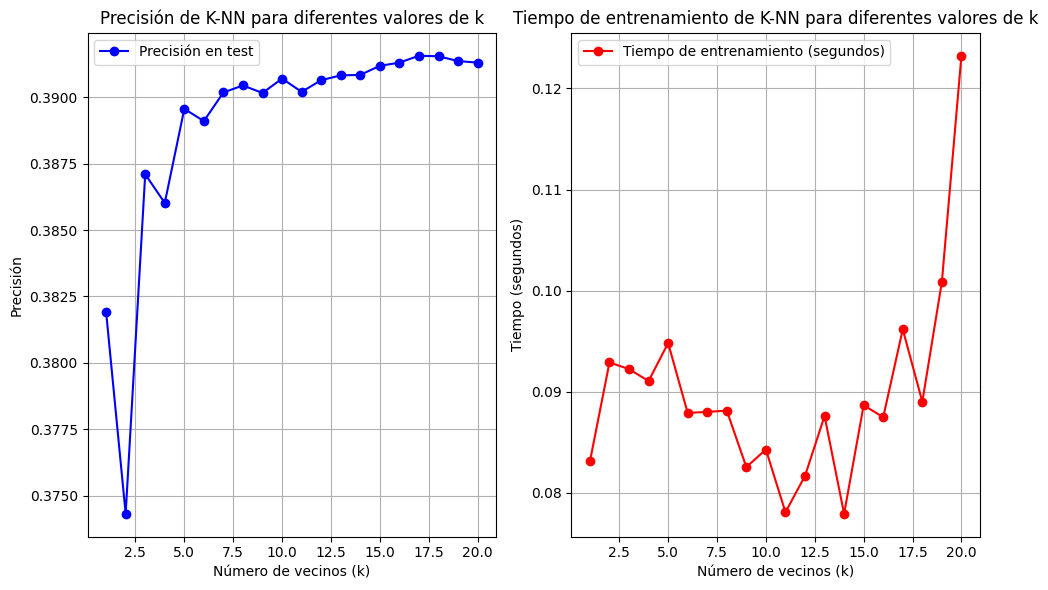

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import time

# Parámetros
k_values = range(1, 21)  # Valores de k a probar (de 1 a 20)
accuracies = []  # Lista para almacenar la precisión de cada k
times = []  # Lista para almacenar el tiempo de entrenamiento de cada k

# Opcional: Aplicar PCA para reducir dimensionalidad a 100 componentes
pca = PCA(n_components=100)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

# Probar diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')  # Usar 'auto' para optimizar el algoritmo
    start_time = time.time()  # Inicio del temporizador
    knn.fit(x_train_reduced, y_train)  # Entrenar el modelo con los datos de entrenamiento
    end_time = time.time()  # Fin del temporizador
    
    # Calcular la precisión
    y_pred = knn.predict(x_test_reduced)  # Predicción del conjunto de prueba
    test_acc = accuracy_score(y_test, y_pred)  # Calcular la precisión
    accuracies.append(test_acc)  # Almacenar la precisión para este k
    times.append(end_time - start_time)  # Almacenar el tiempo de entrenamiento para este k

# Graficar la precisión vs. número de vecinos (k)
plt.figure(figsize=(10, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Precisión en test')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión de K-NN para diferentes valores de k')
plt.legend()
plt.grid(True)

# Gráfico de tiempo de ejecución
plt.subplot(1, 2, 2)
plt.plot(k_values, times, marker='o', linestyle='-', color='r', label='Tiempo de entrenamiento (segundos)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de entrenamiento de K-NN para diferentes valores de k')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


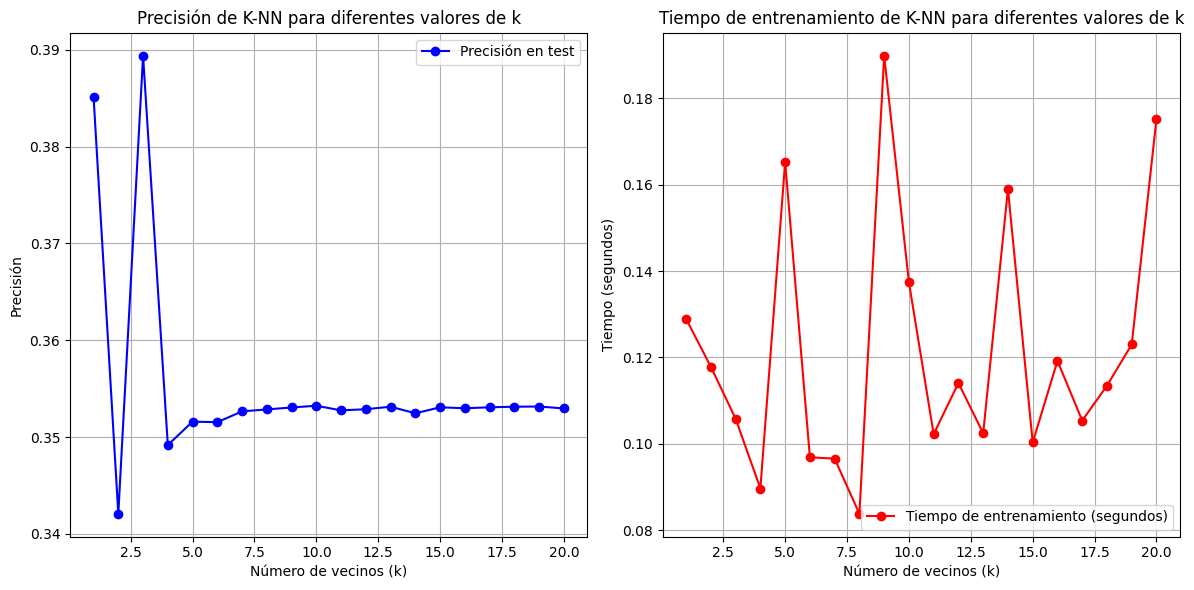

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Preparar los datos con flujo de imágenes (convertirlas a escala de grises y aplanarlas)
x_train = []
y_train = []
x_test = []
y_test = []

# Cargar y preprocesar imágenes del generador de entrenamiento
for img_batch, label_batch in train_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_train.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_train.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_train) >= len(train_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Cargar y preprocesar imágenes del generador de prueba
for img_batch, label_batch in test_generator:
    for img, label in zip(img_batch, label_batch):
        gray_img = np.array(Image.fromarray(img.astype('uint8')).convert('L'))  # Convertir a escala de grises
        x_test.append(gray_img.flatten())  # Aplanar la imagen a un vector
        y_test.append(np.argmax(label))  # Convertir etiquetas one-hot a índices

    if len(x_test) >= len(test_generator.filenames):  # Terminar después de procesar todas las imágenes
        break

# Convertir listas a arrays de numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Normalizar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=100)  # Reducir las características a 100 dimensiones
x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

# Valores de k a probar
k_values = range(1, 21)  # Probar valores de k entre 1 y 20
accuracies = []  # Lista para almacenar la precisión de cada k
times = []  # Lista para almacenar el tiempo de entrenamiento de cada k

# Probar diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')  # Usar 'auto' para optimizar el algoritmo
    start_time = time.time()  # Iniciar temporizador
    knn.fit(x_train_reduced, y_train)  # Entrenar el modelo con los datos de entrenamiento
    end_time = time.time()  # Finalizar temporizador
    
    # Calcular la precisión
    y_pred = knn.predict(x_test_reduced)  # Predicción del conjunto de prueba
    test_acc = accuracy_score(y_test, y_pred)  # Calcular la precisión
    accuracies.append(test_acc)  # Almacenar la precisión para este k
    times.append(end_time - start_time)  # Almacenar el tiempo de entrenamiento para este k

# Graficar la precisión vs. número de vecinos (k)
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Precisión en test')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión de K-NN para diferentes valores de k')
plt.legend()
plt.grid(True)

# Gráfico de tiempo de ejecución
plt.subplot(1, 2, 2)
plt.plot(k_values, times, marker='o', linestyle='-', color='r', label='Tiempo de entrenamiento (segundos)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de entrenamiento de K-NN para diferentes valores de k')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
